## E12 - 나랑 닮은 연예인을 찾아보자

In [1]:
import face_recognition
import os
import numpy as np
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

save_dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity_face_crop'
image_dir = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity'

# 이미지에서 얼굴 영역을 crop하는 함수
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
#     print(face_locations, image_file, end='\n')
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face
    

# 이미지를 crop하여 저장하는 함수
def save_gropped_face(image_dir):
    file_list = os.listdir(image_dir)
    
    for file in file_list:
        image_file = os.path.join(image_dir, file)
        face = get_gropped_face(image_file)
        image_name = os.path.splitext(file)[0]
        pillow_image = Image.fromarray(face)
        pillow_image.save(save_dir_path+"/"+ image_name, "jpeg")
        
    return print("저장 완료!")

In [2]:
# 이미지를 crop하여 저장하기
save_gropped_face(image_dir)

저장 완료!


In [4]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 나의 얼굴 이미지 임베딩 벡터 구하기
my_sel = os.getenv('HOME')+'/aiffel/face_embedding/images/mysel.jpg'
my_face = get_gropped_face(my_sel)

mysel_embedding = get_face_embedding(my_face)
mysel_embedding

[array([-0.0165599 ,  0.13265654,  0.03450987, -0.01857302, -0.12343279,
         0.01441208, -0.07667919, -0.14311416,  0.10567755, -0.05878291,
         0.32251751, -0.03448853, -0.25533572, -0.15434982,  0.04710726,
         0.163725  , -0.19140773, -0.13435502, -0.0258149 ,  0.01725493,
         0.09729296, -0.04521496,  0.01916067,  0.06719048, -0.09818803,
        -0.33998504, -0.12182317, -0.06129246,  0.10464723, -0.10315119,
        -0.09941465,  0.02178128, -0.18572259, -0.02956351,  0.06533287,
         0.08023909, -0.04164085, -0.12383455,  0.17134927, -0.07833629,
        -0.17672066,  0.02938385,  0.03574377,  0.13959827,  0.19677711,
         0.03138896,  0.06271073, -0.12301305,  0.11830446, -0.11919247,
         0.05586829,  0.1930711 ,  0.16247571,  0.06480828, -0.0019586 ,
        -0.19810933, -0.01322226,  0.09187704, -0.13825876, -0.00394897,
         0.0594491 , -0.07781033, -0.03213605, -0.08044881,  0.19323954,
         0.06646148, -0.13817102, -0.22372662,  0.1

In [5]:
image_file = os.path.join(image_dir, 'trump.jpg')
face = get_gropped_face(image_file)   

embedding = get_face_embedding(face)  
embedding

[array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
         0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
         0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
         0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
        -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
        -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
         0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
         0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
        -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
        -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
        -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
        -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
         0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
         0.05921567, -0.06115703, -0.11171092,  0.2

In [6]:
# 각 이미지의 얼굴 임베딩 벡터를 dict구조에 담는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_path = os.path.join(dir_path, file)
        image = face_recognition.load_image_file(image_path)
        embedding = face_recognition.face_encodings(image)
        
#         image_name = file.split('.')[0]
        if len(embedding) > 0:
            image_name = os.path.splitext(file)[0]  # os.path.splitext(): 확장자를 분리하는 함수
            embedding_dict[image_name] = embedding[0]
               
    return embedding_dict

In [7]:
embedding_dict = get_face_embedding_dict(save_dir_path)
embedding_dict['trump']

array([-0.1577159 ,  0.1952603 ,  0.02991983,  0.02818013, -0.06614297,
        0.03226885,  0.08835974, -0.16409735,  0.07313249, -0.05215123,
        0.17921707, -0.05643745, -0.3462607 , -0.04454927,  0.03118477,
        0.16290946, -0.13287032, -0.15449531, -0.2325943 , -0.07984684,
       -0.00110842,  0.02875725, -0.09712245, -0.03118264, -0.09200521,
       -0.25836068, -0.00893589, -0.10712124,  0.05647784, -0.06955367,
        0.04894427, -0.00330306, -0.19983953, -0.06158917,  0.00696913,
        0.02011138, -0.15092731, -0.07716173,  0.17412448,  0.02161741,
       -0.21536557, -0.04196168,  0.06859227,  0.21628338,  0.15793563,
       -0.02367022,  0.01498575, -0.11155633,  0.09166069, -0.25534871,
       -0.00965889,  0.12439445,  0.14585254,  0.16627981,  0.07253683,
       -0.15905923,  0.00238181,  0.10055285, -0.18698661,  0.11038747,
        0.11789907, -0.22645894, -0.07089299, -0.07225447,  0.09870293,
        0.06758345, -0.05124203, -0.1093278 ,  0.25238395, -0.16

#### crop한 후 저장 이미지로 구한 임베딩 벡터값이랑 이미지에서 crop한 후 구한 임베딩 벡터값이 다르다.

In [8]:
# 두 이미지 사이의 L2구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(name1-embedding_dict[name2], ord=2)

# name1, name2의 거리를 비교하는 함수
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [9]:
# 임의의 이미지를 입력하면 이 이미지와 유사한 임베딩 벡터를 가진 이미지를 정렬해서 출력해주는 함수

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    face_list = sorted(embedding_dict, key=lambda x:sort_key_func(x))
    res = face_list[1:min(len(face_list), top+1)]
    
    for i, x in enumerate(res):
        print('순위 {} : 이름({}), 거리({})'.format(i+1, x, sort_key_func(x)))
    
    return res

In [10]:
dekal = get_nearest_face(mysel_embedding)

순위 1 : 이름(이연걸), 거리(0.49517399437956)
순위 2 : 이름(이제훈), 거리(0.4977550289164631)
순위 3 : 이름(박건우), 거리(0.5020563384544071)
순위 4 : 이름(류승범), 거리(0.5024277272569441)
순위 5 : 이름(하현우), 거리(0.5056920237186124)


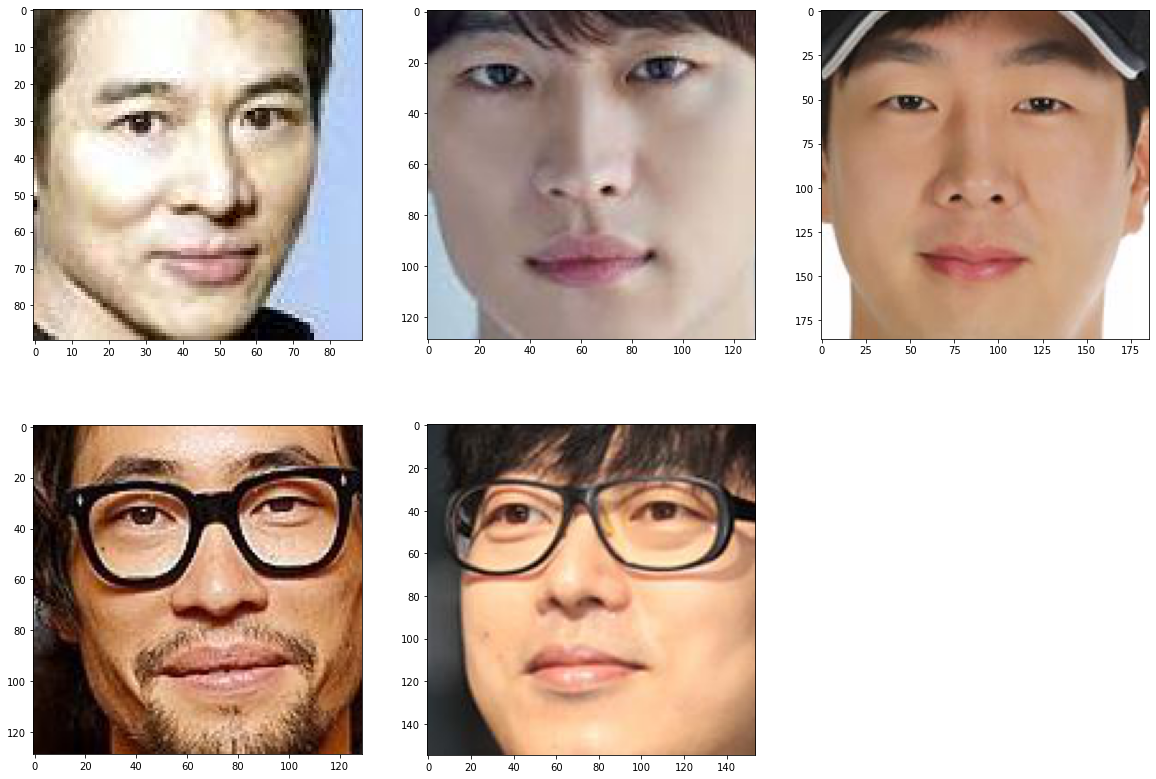

In [11]:
fig = plt.figure(figsize=(20, 14))

for i, x in enumerate(dekal, start=1):
    image_path = os.path.join(save_dir_path, x)
    image = face_recognition.load_image_file(image_path)
    fig.add_subplot(2, 3, i)
    plt.imshow(image)